In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import pickle as pkl

sys.path.append('..')

import evaluation

%matplotlib inline

In [2]:
ls ../reports/comb_nw

results.csv  tracked.pkl


In [3]:
df_all = pd.read_csv('../reports/comb_nw/results.csv')

## Investigate training progression

In [15]:
def plot_progression(df, color=None, label=None, ax=None):
    if not ax:
        ax = plt.subplot(111)
    c = df.sort_values('num')
    ax.plot(c['num'], c['smape'])

In [25]:
df_all[(df_all['n_samples'] == 140000) & (~df_all['ensemble'])]

,input_len,n_samples,combinations,num,epoch,ensemble,smape,mase*
21,18,140000,2,0.0,1,False,13.455460,2.733119
24,18,140000,2,4.0,1,False,13.356286,2.738577
26,18,140000,2,7.0,1,False,13.278613,2.714068
28,18,140000,2,1.0,1,False,13.257140,2.695126
30,18,140000,2,5.0,1,False,40.892954,7.875725
32,18,140000,2,2.0,1,False,13.182354,2.678124
34,18,140000,2,6.0,1,False,13.482851,2.768800
36,18,140000,2,8.0,1,False,13.171529,2.669009
38,18,140000,2,9.0,1,False,13.173361,2.677282
40,18,140000,2,3.0,1,False,13.204876,2.687879


In [26]:
df_all[(df_all['n_samples'] == 140000) & (df_all['ensemble'])]

,input_len,n_samples,combinations,num,epoch,ensemble,smape,mase*
22,18,140000,2,0.0,1,True,13.455460,2.733119
23,18,140000,2,NaN,0,True,13.230535,2.696150
25,18,140000,2,4.0,1,True,13.356286,2.738577
27,18,140000,2,7.0,1,True,13.278613,2.714068
29,18,140000,2,1.0,1,True,13.257140,2.695126
31,18,140000,2,5.0,1,True,40.892954,7.875725
33,18,140000,2,2.0,1,True,13.182354,2.678124
35,18,140000,2,6.0,1,True,13.482851,2.768800
37,18,140000,2,8.0,1,True,13.171529,2.669009
39,18,140000,2,9.0,1,True,13.173361,2.677282


(13.0, 17.0)

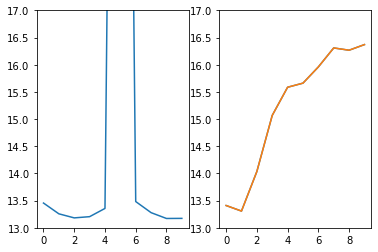

In [23]:
ax = plt.subplot(121)

plot_progression(df_all[(df_all['n_samples'] == 140000) & (~df_all['ensemble'])], ax=ax)
# plot_progression(df_all[(df_all['n_samples'] == 140000) & (df_all['ensemble'])], ax=ax)

ax.set_ylim([13, 17])

ax = plt.subplot(122)

plot_progression(df_all[(df_all['n_samples'] == 1400000) & (~df_all['ensemble'])], ax=ax)
plot_progression(df_all[(df_all['n_samples'] == 1400000) & (df_all['ensemble'])], ax=ax)

ax.set_ylim([13, 17])

In [28]:
df_all[df_all['num'].isna()]

,input_len,n_samples,combinations,num,epoch,ensemble,smape,mase*
2,18,1400000,2,NaN,0,True,14.576544,2.859705
23,18,140000,2,NaN,0,True,13.230535,2.696150


In [21]:
df = df_all[df_all['ensemble'] == True]

## Num samples

<AxesSubplot:xlabel='n_samples', ylabel='smape'>

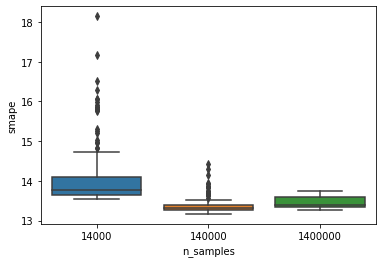

In [22]:
sns.boxplot(x='n_samples', y='smape', data=df[df['combinations'] == 2])

## Combinations

<AxesSubplot:xlabel='combinations', ylabel='smape'>

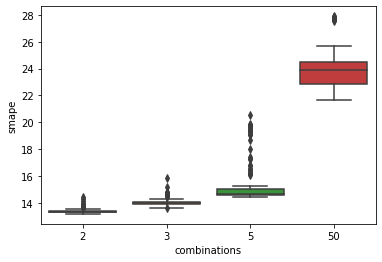

In [23]:
sns.boxplot(x='combinations', y='smape', data=df[df['n_samples'] == 140000])

In [24]:
df.sort_values('smape')

,input_len,n_samples,combinations,num,epoch,ensemble,smape,mase*
1486,18,140000,2,8.0,1,True,13.164625,2.669468
1488,18,140000,2,8.0,2,True,13.184924,2.679224
1510,18,140000,2,8.0,13,True,13.217516,2.692436
1512,18,140000,2,8.0,14,True,13.223116,2.694750
1496,18,140000,2,8.0,6,True,13.223495,2.693900
...,...,...,...,...,...,...,...,...
814,18,1400000,50,1.0,10,True,31.574379,7.684250
810,18,1400000,50,1.0,8,True,31.624678,7.764659
812,18,1400000,50,1.0,9,True,31.639921,7.727459
806,18,1400000,50,1.0,6,True,31.679968,7.788137


In [12]:
df.sort_values('smape')

,input_len,n_samples,combinations,num,epoch,ensemble,smape,mase*
1486,18,140000,2,8.0,1,True,13.164625,2.669468
1488,18,140000,2,8.0,2,True,13.184924,2.679224
1510,18,140000,2,8.0,13,True,13.217516,2.692436
1512,18,140000,2,8.0,14,True,13.223116,2.694750
1496,18,140000,2,8.0,6,True,13.223495,2.693900
...,...,...,...,...,...,...,...,...
814,18,1400000,50,1.0,10,True,31.574379,7.684250
810,18,1400000,50,1.0,8,True,31.624678,7.764659
812,18,1400000,50,1.0,9,True,31.639921,7.727459
806,18,1400000,50,1.0,6,True,31.679968,7.788137


Text(2.5, 14, 'baseline')

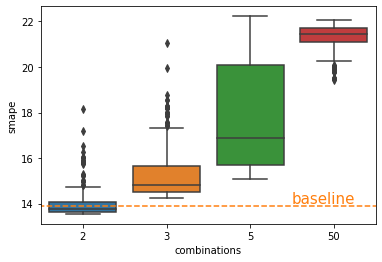

In [37]:
ax = sns.boxplot(x='combinations', y='smape', data=df[df['n_samples'] == 14000])

xlim = ax.get_xlim()
plt.plot([-1, 5], [13.893, 13.893], c='C1', ls='--')
ax.set_xlim(xlim)
ax.text(2.5, 14, 'baseline', size=15, c='C1')

In [6]:
evaluation.create_results_df_multi_weights(results, columns)

{'smape': {'inp_18__num_1400000__comb_2__2__epoch_1': 13.460080841923117,
  'ens__inp_18__num_1400000__comb_2__2__epoch_1': 13.460080841923117,
  'inp_18__num_1400000__comb_2__2__epoch_2': 13.27667577221443,
  'ens__inp_18__num_1400000__comb_2__2__epoch_2': 13.353594396665905,
  'inp_18__num_1400000__comb_2__2__epoch_3': 13.33093127971963,
  'ens__inp_18__num_1400000__comb_2__2__epoch_3': 13.332085745246419,
  'inp_18__num_1400000__comb_2__2__epoch_4': 13.215740025366646,
  'ens__inp_18__num_1400000__comb_2__2__epoch_4': 13.279754915414484,
  'inp_18__num_1400000__comb_2__2__epoch_5': 13.2347076802389,
  'ens__inp_18__num_1400000__comb_2__2__epoch_5': 13.264596334266992,
  'inp_18__num_1400000__comb_2__2__epoch_6': 13.315555957259686,
  'ens__inp_18__num_1400000__comb_2__2__epoch_6': 13.254803438474626,
  'inp_18__num_1400000__comb_2__2__epoch_7': 13.492612495615901,
  'ens__inp_18__num_1400000__comb_2__2__epoch_7': 13.267112824828539,
  'inp_18__num_1400000__comb_2__2__epoch_8': 13.31

In [10]:
for exp in valid_experiments:
    
    with open(exp, 'rb') as f:
        results = pkl.load(f)
        
    df2 = evaluation.create_results_df_multi_weights(results, columns)
    df = pd.concat([df, df2])
    

In [13]:
df = df.drop_duplicates()

In [19]:
df[df['num'] == '1']

,input_len,num_samples,combinations,num,epoch,ensemble,smape,mase*
255,18,1400000,2,1,1,False,13.575788,2.775999
256,18,1400000,2,1,1,True,13.575788,2.775999
257,18,1400000,2,1,2,False,13.380530,2.714128
258,18,1400000,2,1,2,True,13.438550,2.737429
259,18,1400000,2,1,3,False,13.327459,2.699944
...,...,...,...,...,...,...,...,...
3760,18,14000,50,1,13,True,20.011725,4.085041
3761,18,14000,50,1,14,False,19.249084,3.888317
3762,18,14000,50,1,14,True,19.864460,4.051946
3763,18,14000,50,1,15,False,20.043087,4.105721


<AxesSubplot:xlabel='epoch', ylabel='smape'>

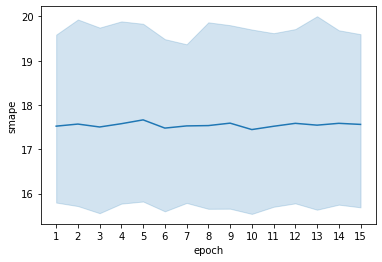

In [20]:
sns.lineplot(x='epoch', y='smape', data=df[df['num'] == '1'])

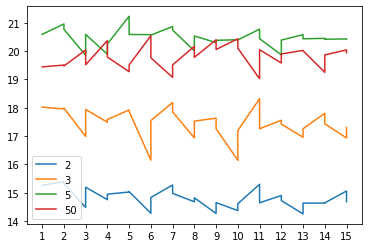

In [33]:
d = df[df['num'] == '1']

for c in d['combinations'].unique():
    
    d2 = d[(d['num_samples'] == '14000') & (d['combinations'] == c)]
    plt.plot(d2['epoch'], d2['smape'], label=c)
    
plt.legend()

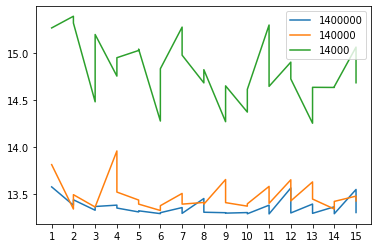

In [35]:
d = df[df['num'] == '1']

for n in d['num_samples'].unique():
    
    d2 = d[(d['num_samples'] == n) & (d['combinations'] == '2')]
    plt.plot(d2['epoch'], d2['smape'], label=n)
    
plt.legend()